# **Apache PyArrow** ile Pandas-Spark Dataframe tip dönüşümlerini en az 2.5 kat artırabilirsiniz

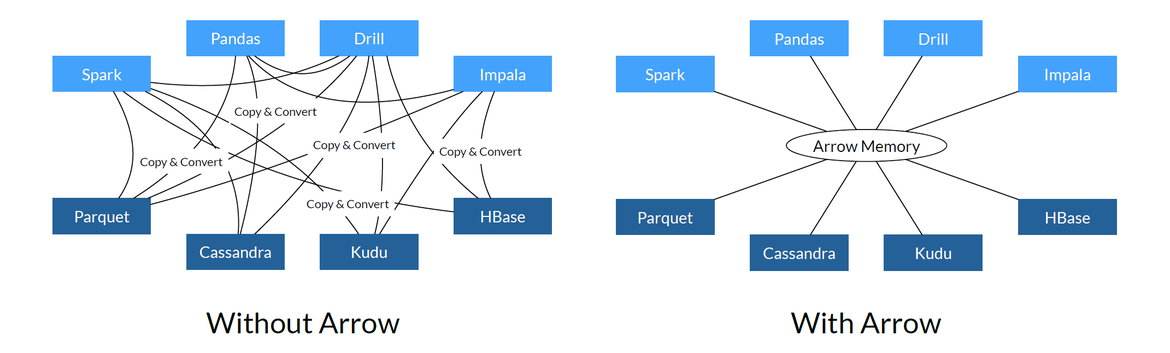

In [13]:
from IPython.display import Image
Image("resim.png")

# Kurulum

In [ ]:
!conda install -c conda-forge pyarrow # veya
!pip install pyarrow

# Kurulum yapsak dahi varsayılan olarak PyArrow  aktif değildir kodumuzda etkin etmek için **spark.conf.set("spark.sql.execution.arrow.enabled", "true")** ifadesini yazmalıyız.

# Yada varsayılan olarak tüm oturumlarda etkin etmek için **SPARK_HOME/conf/spark-defaults.conf.** sayfasına **spark.sql.execution.arrow.enabled=true** ifadesini eklemeliyiz.

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [3]:
import numpy as np
import pandas as pd
spark = SparkSession\
        .builder\
        .appName("PyArrow_Test")\
        .enableHiveSupport()\
        .getOrCreate()


# İki Pandas dataframe oluşturalım ve varsayılan olarak spark dataframe e dönüştürelim

In [4]:
# Creating two different pandas DataFrame with same data
pdf1 = pd.DataFrame(np.random.rand(100000, 3))
pdf2 = pd.DataFrame(np.random.rand(100000, 3))
# Let’s test the conversion of Pandas DataFrames to Spark DataFrames first without modifying anything and then allowing PyArrow.
%time df1 = spark.createDataFrame(pdf1)

CPU times: user 4.32 s, sys: 12 ms, total: 4.33 s
Wall time: 12.2 s


In [5]:
# Now Enable Arrow-based columnar data transfers in Spark
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
%time df2 = spark.createDataFrame(pdf2)

CPU times: user 60 ms, sys: 8 ms, total: 68 ms
Wall time: 132 ms


## Nerdeyse 10katı

# Şimdi de spark'dan Pandas a tip dönüşümünü yapalım

In [6]:
df=spark.createDataFrame(["10","11","13"],"string").toDF("age")
# conver into pandas dt and check time
%time pdf1 = df.toPandas()

CPU times: user 32 ms, sys: 4 ms, total: 36 ms
Wall time: 1.92 s


In [7]:
spark.conf.set("spark.sql.execution.arrow.enables","true")
%time pdf2=df.toPandas()

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 255 ms
